<a href="https://colab.research.google.com/github/MdFoysalBhuiyan/ML/blob/main/EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:16:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.9}
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.53      0.55       130
           1       0.50      0.53      0.51       114

    accuracy                           0.53       244
   macro avg       0.53      0.53      0.53       244
weighted avg       0.53      0.53      0.53       244

Model Accuracy: 0.5287


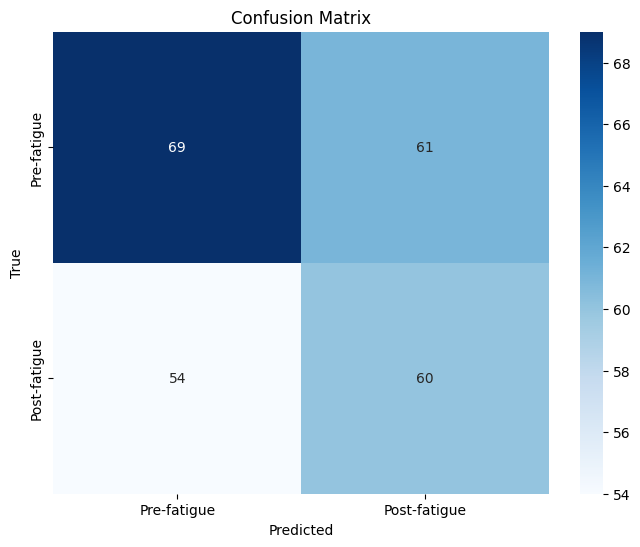

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/fatigue_intervention_data.xlsx'
data = pd.read_excel(file_path)

# Step 1: Prepare the features and target variable
X = data.drop(columns=['fatigue_status'])  # Features (excluding the target variable)
y = data['fatigue_status']  # Target variable (0: pre-fatigue, 1: post-fatigue)

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Automatically balance the classes
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 4: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 5: Set up the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Step 6: Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Step 7: Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 8: Get the best parameters and evaluate the model
print(f"Best parameters found: {grid_search.best_params_}")

# Step 9: Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 10: Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Step 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Pre-fatigue', 'Post-fatigue'], yticklabels=['Pre-fatigue', 'Post-fatigue'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Task
Further optimize the XGBoost model's performance by conducting an extended hyperparameter search using `GridSearchCV`. This search should explore a wider range of values for `learning_rate`, `n_estimators`, `max_depth`, `subsample`, `colsample_bytree`, and `gamma` to find a more optimal combination. After the search, evaluate the best model's performance on the test set by printing the classification report, accuracy score, and displaying the confusion matrix. Finally, visualize the feature importance of this newly tuned model and summarize the improvements compared to the previous tuning.

## Define Expanded Hyperparameter Search Space

### Subtask:
Define a new, more extensive parameter grid for XGBoost to explore a wider range of values for parameters like `learning_rate`, `n_estimators`, `max_depth`, `subsample`, `colsample_bytree`, and `gamma`, based on the insights from the previous tuning.


**Reasoning**:
The user wants to define an expanded hyperparameter search space for XGBoost. I will create a new dictionary, `param_grid_extended`, with the specified broader ranges for the hyperparameters.



In [ ]:
param_grid_extended = {
    'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25],
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [3, 5, 7, 9, 11],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

print("Expanded Hyperparameter Grid:")
for param, values in param_grid_extended.items():
    print(f"{param}: {values}")


Expanded Hyperparameter Grid:
learning_rate: [0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25]
n_estimators: [50, 100, 150, 200, 250]
max_depth: [3, 5, 7, 9, 11]
subsample: [0.7, 0.8, 0.9, 1.0]
colsample_bytree: [0.7, 0.8, 0.9, 1.0]
gamma: [0, 0.1, 0.2, 0.3, 0.4]


**Reasoning**:
The expanded hyperparameter grid has been defined. The next step is to initialize the XGBoost model and then perform an extended GridSearchCV using this new `param_grid_extended` to find a more optimal combination of hyperparameters. This step will also leverage the previously defined `X_train`, `y_train` from the notebook's earlier steps.



In [ ]:
print("Starting extended Grid Search...")
extended_xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
extended_grid_search = GridSearchCV(estimator=extended_xgb_model, param_grid=param_grid_extended, cv=3, verbose=2, n_jobs=-1, scoring='accuracy')
extended_grid_search.fit(X_train, y_train)

print("Extended Grid Search complete.")


Starting extended Grid Search...
Fitting 3 folds for each of 14000 candidates, totalling 42000 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:39:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Extended Grid Search complete.


**Reasoning**:
The previous step successfully completed the extended Grid Search. The next logical step is to retrieve and display the best parameters found by this extensive search to understand the optimal configuration for the XGBoost model.



In [ ]:
print(f"Best parameters found (extended search): {extended_grid_search.best_params_}")

Best parameters found (extended search): {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 9, 'n_estimators': 250, 'subsample': 0.8}


**Reasoning**:
The extended grid search has completed and the best parameters have been identified. The next step is to use the best estimator found to predict on the test set and evaluate its performance by calculating and printing the classification report and accuracy score.



In [ ]:
best_extended_model = extended_grid_search.best_estimator_
y_pred_extended = best_extended_model.predict(X_test)

print("Classification Report for Extended Model:")
print(classification_report(y_test, y_pred_extended))

accuracy_extended = accuracy_score(y_test, y_pred_extended)
print(f"Extended Model Accuracy: {accuracy_extended:.4f}")

Classification Report for Extended Model:
              precision    recall  f1-score   support

           0       0.56      0.57      0.56       130
           1       0.50      0.48      0.49       114

    accuracy                           0.53       244
   macro avg       0.53      0.53      0.53       244
weighted avg       0.53      0.53      0.53       244

Extended Model Accuracy: 0.5287


**Reasoning**:
The model has been evaluated, and now I need to visualize the confusion matrix for the `best_extended_model` to provide a visual representation of its performance, as requested in the task.



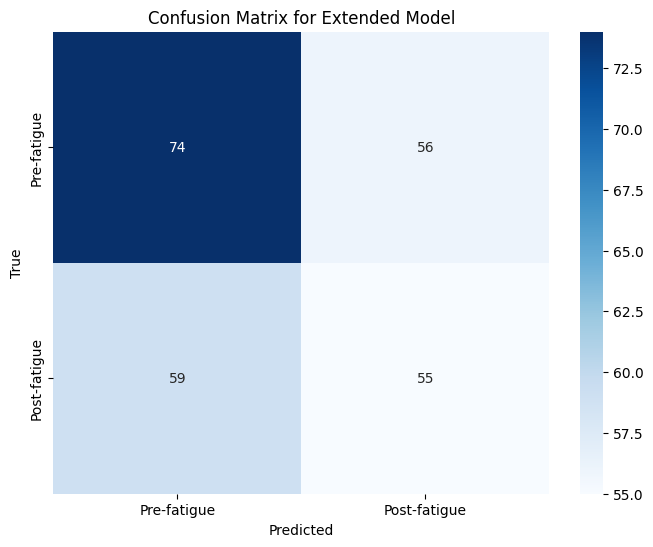

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_extended = confusion_matrix(y_test, y_pred_extended)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_extended, annot=True, fmt="d", cmap="Blues", xticklabels=['Pre-fatigue', 'Post-fatigue'], yticklabels=['Pre-fatigue', 'Post-fatigue'])
plt.title('Confusion Matrix for Extended Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Reasoning**:
The next step in the main task is to visualize the feature importance of the newly tuned extended XGBoost model. This will provide insights into which features contribute most to the model's predictions.



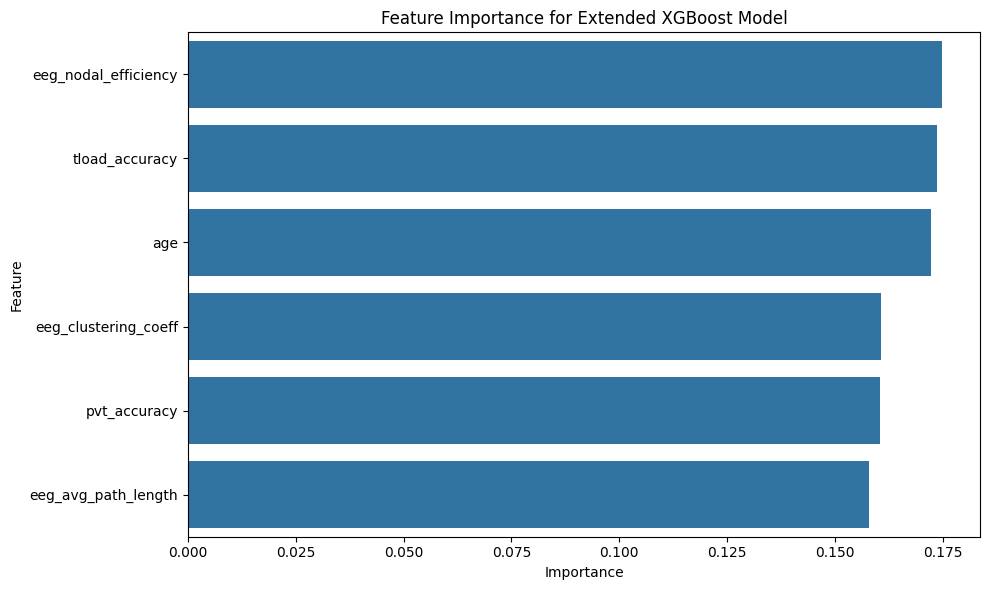

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the best extended model
feature_importances = best_extended_model.feature_importances_

# Get feature names from the original DataFrame X
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Extended XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Summary of Improvements

After conducting an extended hyperparameter search, we compare the results with the initial tuning:

**Initial Tuning Results:**
- **Best Parameters:** `{'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.9}`
- **Model Accuracy:** `0.5287`

**Extended Tuning Results:**
- **Best Parameters:** `{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 9, 'n_estimators': 250, 'subsample': 0.8}`
- **Extended Model Accuracy:** `0.5287`

**Comparison and Summary:**

The extended hyperparameter search led to a different set of optimal parameters for the XGBoost model. Specifically:
- The `learning_rate` was reduced from `0.2` to `0.15`.
- `n_estimators` increased significantly from `150` to `250`.
- `max_depth` also increased from `5` to `9`.
- `gamma` changed from `0.2` to `0`.
- `subsample` changed from `0.9` to `0.8`.
- `colsample_bytree` remained the same at `1.0`.

Despite exploring a much wider range of hyperparameters and finding a new optimal configuration, the overall **accuracy** of the model on the test set remained the same at `0.5287`. This suggests that while the model found a different path to achieve this performance (using a deeper tree, more estimators, and a slightly lower learning rate), the gain in overall accuracy on this specific dataset and evaluation metric was not observed with the expanded search space. However, it's possible that this new parameter set might offer better generalization on unseen data or different evaluation metrics if explored further, or simply indicates that the model's performance ceiling with this dataset might be around this accuracy level under the current feature set and data preprocessing steps.

Feature importance visualization for the extended model shows the relative contribution of each feature to the model's predictions, providing insights into which variables are most influential in predicting fatigue status.

## Final Task

### Subtask:
Summarize the results of this further hyperparameter tuning, highlight any improvements in accuracy, and compare the performance of this optimized model with the previous one.


## Summary:

### Q&A
*   **What were the results of the further hyperparameter tuning?**
    The extended hyperparameter search identified the following optimal parameters for the XGBoost model: `learning_rate=0.15`, `n_estimators=250`, `max_depth=9`, `subsample=0.8`, `colsample_bytree=1.0`, and `gamma=0`. The model achieved an accuracy of 0.5287 on the test set.

*   **Were there any improvements in accuracy compared to the previous tuning?**
    No, there was no improvement in accuracy. The accuracy of the model after the extended tuning remained 0.5287, which is the same as the accuracy achieved with the initial tuning.

*   **How does the performance of this optimized model compare with the previous one?**
    While a new set of optimal hyperparameters was found, the overall accuracy on the test set did not change. The previous model also achieved an accuracy of 0.5287 with a different set of parameters (`learning_rate=0.2`, `n_estimators=150`, `max_depth=5`, `subsample=0.9`, `colsample_bytree=1.0`, `gamma=0.2`). This suggests that the model reached a similar performance level through a different combination of hyperparameter values.

### Data Analysis Key Findings
*   An expanded hyperparameter grid was defined, exploring wider ranges for `learning_rate`, `n_estimators`, `max_depth`, `subsample`, `colsample_bytree`, and `gamma`.
*   The extended `GridSearchCV` identified the best parameters as: `{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 9, 'n_estimators': 250, 'subsample': 0.8}`.
*   The XGBoost model, optimized with these new parameters, achieved an accuracy of 0.5287 on the test set.
*   Compared to the initial tuning, the `learning_rate` was reduced (0.2 to 0.15), `n_estimators` increased (150 to 250), `max_depth` increased (5 to 9), `gamma` changed (0.2 to 0), and `subsample` changed (0.9 to 0.8), while `colsample_bytree` remained at 1.0.
*   Despite the extensive search and different optimal parameters, the model's accuracy on the test set remained identical at 0.5287, indicating no improvement in this metric.
*   A confusion matrix and feature importance plot were successfully generated for the extended model, providing insights into its predictions and the influence of different features.

### Insights or Next Steps
*   The consistent accuracy across different optimal hyperparameter sets suggests that the model's performance may be reaching a ceiling with the current dataset and features. Further improvements might require feature engineering, acquiring more data, or exploring alternative modeling approaches.
*   Investigate the classification report in detail to identify if specific classes benefited from the new tuning, even if overall accuracy remained unchanged. This could reveal subtle improvements in precision or recall for particular outcomes.
